In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

<h1>Loading Dataset</h1>

In [2]:
data = pd.read_csv('master.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


<h1>Data Wrangling</h1>

In [5]:
#handling missing values and maintaining consistency
data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [6]:
data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [7]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [9]:
data['suicides_no'].unique()

array([  21,   16,   14, ..., 5503, 4359, 2872], dtype=int64)

In [10]:
data['population'].unique()

array([ 312900,  308000,  289700, ..., 2762158, 2631600, 1438935],
      dtype=int64)

In [11]:
data['suicides/100k pop'].unique()

array([ 6.71,  5.19,  4.83, ..., 47.86, 40.75, 26.61])

In [12]:
data['country-year'].unique()

array(['Albania1987', 'Albania1988', 'Albania1989', ..., 'Uzbekistan2012',
       'Uzbekistan2013', 'Uzbekistan2014'], dtype=object)

In [13]:
data['HDI for year'].unique()

array([  nan, 0.619, 0.656, 0.695, 0.722, 0.781, 0.783, 0.694, 0.705,
       0.731, 0.762, 0.775, 0.811, 0.818, 0.831, 0.833, 0.836, 0.632,
       0.605, 0.648, 0.721, 0.723, 0.728, 0.733, 0.865, 0.882, 0.898,
       0.927, 0.93 , 0.932, 0.933, 0.935, 0.764, 0.794, 0.815, 0.853,
       0.879, 0.881, 0.884, 0.885, 0.609, 0.64 , 0.778, 0.78 , 0.774,
       0.786, 0.727, 0.816, 0.819, 0.817, 0.821, 0.824, 0.7  , 0.716,
       0.753, 0.765, 0.793, 0.785, 0.683, 0.796, 0.798, 0.806, 0.851,
       0.874, 0.866, 0.883, 0.886, 0.889, 0.888, 0.89 , 0.644, 0.664,
       0.701, 0.71 , 0.711, 0.715, 0.724, 0.576, 0.608, 0.702, 0.737,
       0.742, 0.746, 0.752, 0.755, 0.686, 0.696, 0.713, 0.749, 0.773,
       0.779, 0.782, 0.827, 0.849, 0.861, 0.867, 0.892, 0.903, 0.909,
       0.91 , 0.912, 0.654, 0.699, 0.788, 0.814, 0.83 , 0.832, 0.573,
       0.596, 0.629, 0.679, 0.706, 0.718, 0.72 , 0.623, 0.652, 0.682,
       0.704, 0.75 , 0.756, 0.761, 0.766, 0.807, 0.653, 0.685, 0.73 ,
       0.776, 0.772,

In [14]:
#replace null values with the mode
temp = stats.mode(data['HDI for year'])
print(temp)
data['HDI for year'] = data['HDI for year'].fillna(0.713)
#reminder to myself - this is a temporary arrangement just to keep the ball rolling, GET BACK TO IT

ModeResult(mode=array([0.713]), count=array([84]))


In [15]:
data['gdp_per_capita ($)'].unique()

array([ 796,  769,  833, ..., 1964, 2150, 2309], dtype=int64)

In [16]:
#changing column name for convenience
data['gdp_for_year($)'] = data[' gdp_for_year ($) ']

In [17]:
data['gdp_for_year($)'].unique()

array(['2,156,624,900', '2,126,000,000', '2,335,124,988', ...,
       '51,821,573,338', '57,690,453,461', '63,067,077,179'], dtype=object)

In [18]:
data['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

<h1>Exploratory Data Analysis (EDA)</h1>

Text(0.5, 1.0, 'Top 10 Countries')

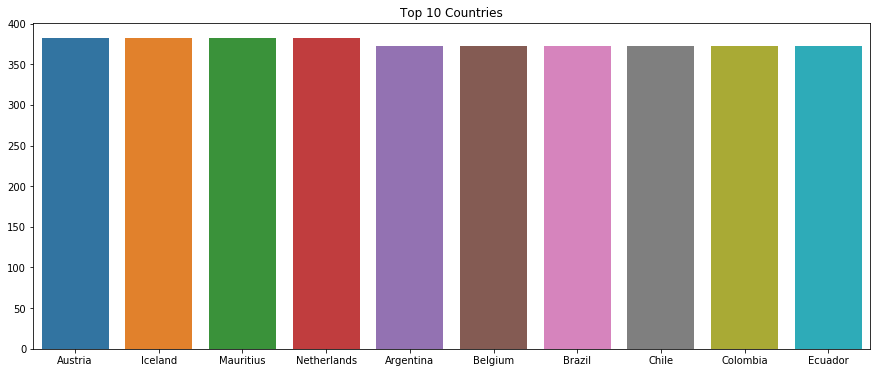

In [19]:
#top 10 countries
countries = Counter(data['country'].tolist()).most_common(10)
country_idx = [country[0] for country in countries]
country_val = [country[1] for country in countries]
plt.subplots(figsize=(15,6))
sns.barplot(x = country_idx,y=country_val )
plt.title('Top 10 Countries')

Text(0.5, 1.0, 'Bottom 10 Countries')

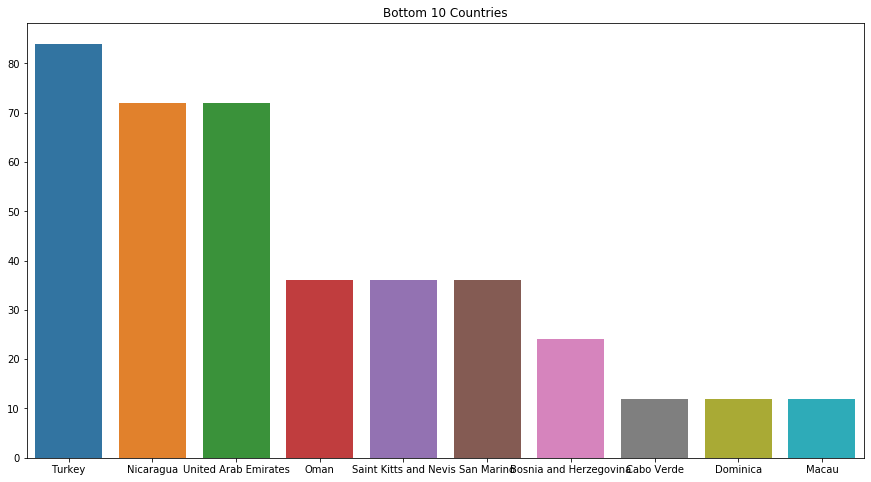

In [20]:
#least common 10 countries
countries2 = Counter(data['country'].tolist()).most_common()[-11:-1]
country2_idx = [country[0] for country in countries2]
country2_val = [country[1] for country in countries2]
plt.subplots(figsize=(15,8))
sns.barplot(x = country2_idx,y=country2_val )
plt.title('Bottom 10 Countries')

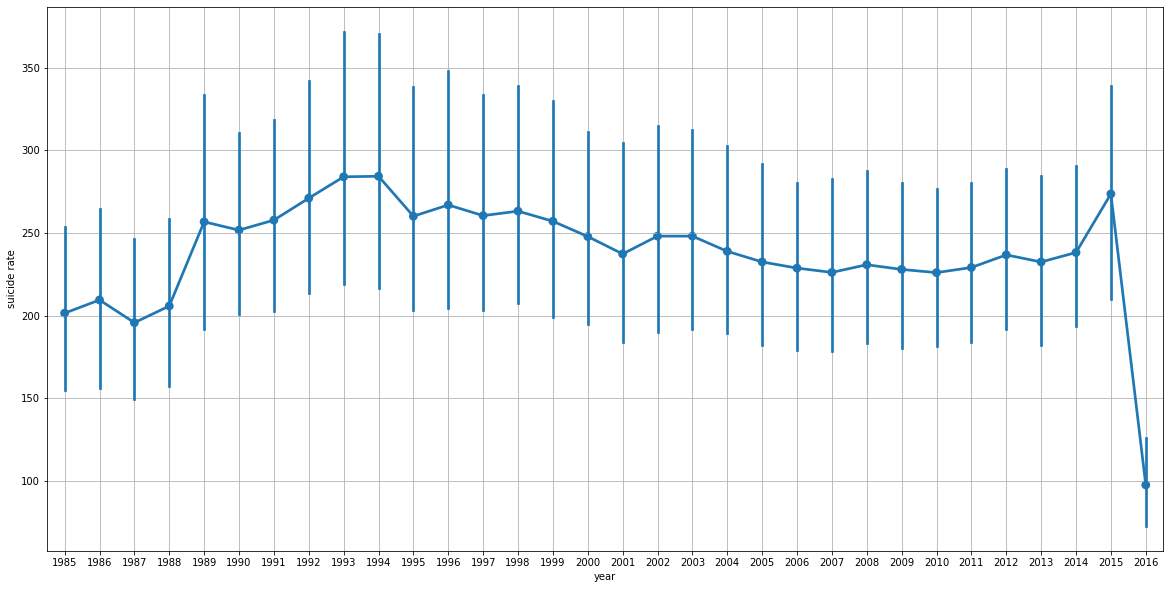

In [21]:
#year that had the most number of deaths
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='year',y='suicides_no',data=data)
plt.xlabel('year')
plt.ylabel('suicide rate')
plt.grid()
#the steep decrease in the year 2016 could mean incomplete data. but there seems to be a rise between the years 1991-1994

Text(0.5, 1.0, 'Generation Wise')

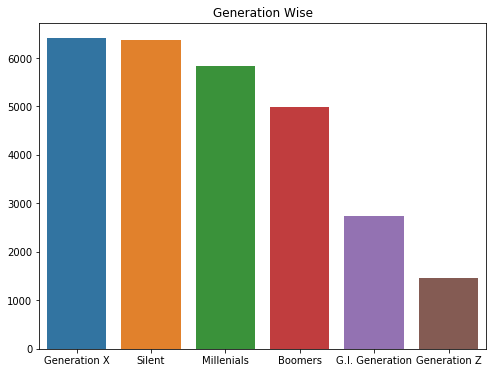

In [22]:
#generation wise
generations = Counter(data['generation'].tolist()).most_common(6)
index = [generation[0] for generation in generations]
value = [generation[1] for generation in generations]
plt.subplots(figsize=(8,6))
sns.barplot(x = index,y = value)
plt.title('Generation Wise')
#the data is biased, there is not much insight after the Silent generation

In [23]:
#dropping unnecessary columns
data.pop('country-year')

0           Albania1987
1           Albania1987
2           Albania1987
3           Albania1987
4           Albania1987
              ...      
27815    Uzbekistan2014
27816    Uzbekistan2014
27817    Uzbekistan2014
27818    Uzbekistan2014
27819    Uzbekistan2014
Name: country-year, Length: 27820, dtype: object

In [24]:
#preprocessing
for feature in data:
    le = preprocessing.LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null int32
year                  27820 non-null int64
sex                   27820 non-null int32
age                   27820 non-null int32
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null int64
HDI for year          27820 non-null int64
 gdp_for_year ($)     27820 non-null int32
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null int32
gdp_for_year($)       27820 non-null int32
dtypes: int32(6), int64(6)
memory usage: 1.9 MB
None


,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,gdp_for_year($)
0,0,2,1,0,21,9950,670,104,726,83,2,726
1,0,2,1,2,16,9835,518,104,726,83,5,726
2,0,2,0,0,14,9358,482,104,726,83,2,726
3,0,2,1,5,1,2606,458,104,726,83,1,726
4,0,2,1,1,9,8945,327,104,726,83,0,726


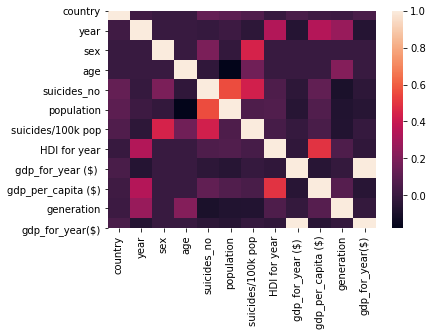

In [25]:
#correlation
correlation = data.corr()
sns.heatmap(correlation)

<h1>Linear Regression</h1>

In [26]:
y = data.pop('suicides/100k pop')

In [27]:
X = data

In [28]:
X

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,gdp_for_year($)
0,0,2,1,0,21,9950,104,726,83,2,726
1,0,2,1,2,16,9835,104,726,83,5,726
2,0,2,0,0,14,9358,104,726,83,2,726
3,0,2,1,5,1,2606,104,726,83,1,726
4,0,2,1,1,9,8945,104,726,83,0,726
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,21487,74,1936,355,2,1936
27816,100,29,0,5,9,10720,74,1936,355,5,1936
27817,100,29,1,3,60,20457,74,1936,355,3,1936
27818,100,29,0,3,44,20332,74,1936,355,3,1936


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5820,1030,1708.614778
23242,3739,1656.175005
25643,87,227.502367
24011,3790,2028.504391
21706,886,1340.440896
...,...,...
20513,1821,2212.549508
11907,1799,1625.799555
4857,2523,1788.108680
17793,327,842.246248
